In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
%load_ext tensorboard
from tensorflow.keras.callbacks import TensorBoard
log_dir='log/'
!rm -rf log/

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
IMAGE_SHAPE = (224, 224,3)

train_path = '/content/drive/MyDrive/Kaggle/BreaKHis 400X/train'
test_path = '/content/drive/MyDrive/Kaggle/BreaKHis 400X/test'


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = True)

Found 1148 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 545 images belonging to 2 classes.


In [ ]:
trainX, trainY = training_set.next()
testX, testY = test_set.next()


In [ ]:
print('Train X=%s Y=%s' %(trainX.shape, trainY.shape))
print('Test X=%s Y=%s' %(testX.shape, testY.shape))


Train X=(32, 224, 224, 3) Y=(32, 2)
Test X=(1, 224, 224, 3) Y=(1, 2)


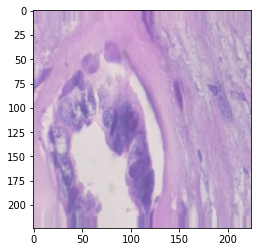

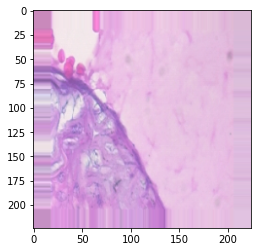

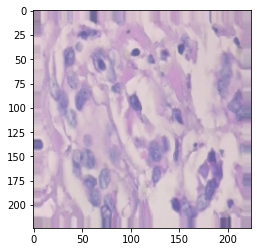

In [ ]:
x,y = training_set.next()
for i in range(0,3):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
breast = model.fit(training_set, validation_data = test_set, epochs=10)

Epoch 1/10
36/36 [==============================] - 531s 14s/step - loss: 3.4124 - accuracy: 0.7322 - val_loss: 2.8124 - val_accuracy: 0.6771
Epoch 2/10
36/36 [==============================] - 34s 947ms/step - loss: 3.1372 - accuracy: 0.7678 - val_loss: 4.9529 - val_accuracy: 0.6771
Epoch 3/10
36/36 [==============================] - 34s 955ms/step - loss: 2.1391 - accuracy: 0.8028 - val_loss: 1.4342 - val_accuracy: 0.6771
Epoch 4/10
36/36 [==============================] - 34s 951ms/step - loss: 0.8965 - accuracy: 0.8360 - val_loss: 0.8253 - val_accuracy: 0.6771
Epoch 5/10
36/36 [==============================] - 34s 942ms/step - loss: 0.7656 - accuracy: 0.8514 - val_loss: 1.1395 - val_accuracy: 0.6771
Epoch 6/10
36/36 [==============================] - 34s 949ms/step - loss: 0.5603 - accuracy: 0.8325 - val_loss: 0.6774 - val_accuracy: 0.6771
Epoch 7/10
36/36 [==============================] - 34s 949ms/step - loss: 0.4590 - accuracy: 0.8236 - val_loss: 0.7042 - val_accuracy: 0.6771


In [ ]:
score = model.evaluate(test_set)

545/545 [==============================] - 9s 16ms/step - loss: 0.7479 - accuracy: 0.6771


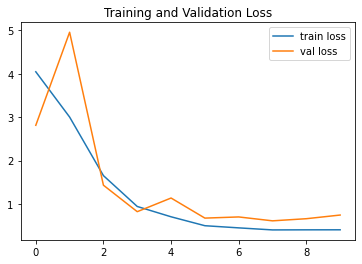

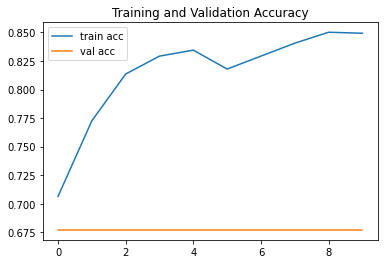

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(breast.history['loss'], label='train loss')
plt.plot(breast.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(breast.history['accuracy'], label='train acc')
plt.plot(breast.history['val_accuracy'], label='val acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       176
           1       0.68      1.00      0.81       369

    accuracy                           0.68       545
   macro avg       0.34      0.50      0.40       545
weighted avg       0.46      0.68      0.55       545



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


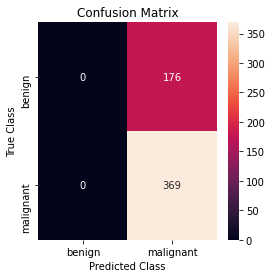

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# T0 print the Classification Report
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(test_set.classes, y_pred))


# To print the Confusion Matrix
cf_matrix = confusion_matrix(test_set.classes, y_pred)
Labels = ['benign', 'malignant']
plt.figure(figsize=(4, 4))
heatmap = sns.heatmap(cf_matrix, xticklabels=Labels, yticklabels=Labels, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()